# Common utilities

Module [majordome.common](../modules/common.md) provides a set of utilities that are whether too general purpose for integrating another module or still waiting to find their definitive home. These include constants, type aliases, and functionalities of different kinds. Regarding this last kind of components, this tutorial aims at illustrating their use for practical documentation.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from majordome import (
    RelaxUpdate,
    StabilizeNvarsConvergenceCheck,
    MajordomePlot,
)
import numpy as np

## *ReadTextData*

WIP, sorry for the inconvenience...

## *MajordomePlot*

Class `MajordomePlot` aims at simplifying the plotting of publication-quality figures across Majordome (and beyond!). Below we illustrate how to use this functionality to ensure all the plots in a project look the same. Here we create a function that will be used below in the examples. To get it working, you need to:

- Have a function with signature `func(*args, plot=None, **kwargs) -> None`, where it is recommended (for linter) to provide explictly keyword `plot=None`.
- Unpack `fig, ax = plot.subplots()` or just `_, ax = plot.subplots()`, as needed, inside the figure; these contain standard `matplotlib` figure and axes.
- Use decorator `@MajordomePlot.new` with all its configurable attributes; for details, please refer to its API documentation.

The decorator will modify your function so that it returns an instance of `MajordomePlot`, which can be used for further customization. Please notice that the axes object has been row-wise flattened so that it has a single dimension; in a figure with `shape=(2, 3)`, subplot `(1, 2)` is found at `ax[1]` and `(2, 1)` is found at `ax[3]`.

In [3]:
@MajordomePlot.new(size=(8, 5))
def plot_history(history, *, plot=None):
    """ Plot relaxation history. """
    fig, ax = plot.subplots()

    ax[0].plot(history)
    ax[0].set_title("Verification of relaxation progress")
    ax[0].set_xlabel("Update iteration")
    ax[0].set_ylabel("Updated value")

## *InteractiveSession*

WIP, sorry for the inconvenience...

## *RelaxUpdate* and *StabilizeNvarsConvergenceCheck*

Simplest of relaxation methods; assume you have a new updated solution $A_{new}^{\star}$ for a problem whose past state was $A_{old}$, then the manager will ensure the following relaxation will be applied to compute the next solution state $A_{new}$ to be used in whatever you are computing:

$$
\begin{align}
A_{new} &= \alpha{}A_{old} + (1-\alpha)A_{new}^{\star}\\
A_{old} &= A_{new}
\end{align}
$$

Notice that in this formulation, $\alpha$ (or `alpha` in the API) represents the fraction of old solution to be used in the *smearing* process. Below we illustrate the effect of a step function $H$ valued at `10` from the begining over consecutive updates (here we do not test for convergence, as that is problem specific and for this simple case the required number of steps could be evaluated by hand, take some time to try!).

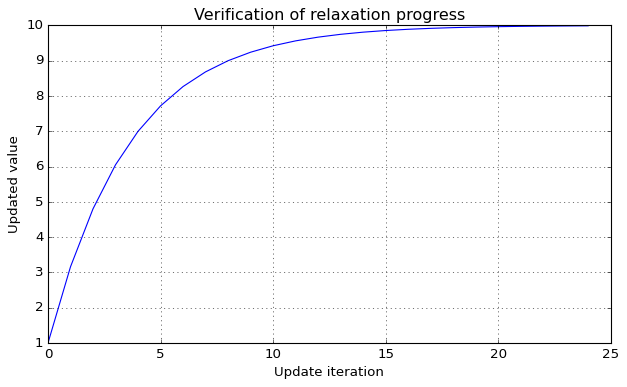

In [4]:
alpha = 0.76
niter = 50

single = np.ones(1)
relaxer = RelaxUpdate(single, alpha)

opts = dict(n_vars=1, max_iter=niter, patience=3, rtol=0.001)
converged = StabilizeNvarsConvergenceCheck(**opts)

history = np.zeros(niter+1)
history[0] = single[0]

H = np.asarray([10])

for n in range(niter):
    single[:] = relaxer(H)
    history[n+1] = single[0]

    if converged(single[0]):
        history = history[:n+2]
        break

_ = plot_history(history)